In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

## Compressive Strength of Confined Concrete $f^{'}_{cc}$

$$f^{'}_{cc} = f^{'}_{co}\left( -1.254 + 2.254\sqrt{1+\frac{7.92f^{'}_{l}}{f^{'}_{co}}} - 2\frac{f^{'}_{l}}{f^{'}_{co}}\right)$$

In [3]:
# http://www.jdcui.com/?p=11858
# http://www.jdcui.com/?p=952
def compStrConfCon(fpco,fpl):
    # fpco = unconfined concrete strength
    A = 2.254*math.sqrt(1+((7.92*fpl)/fpco)) 
    B = 2*(fpl/fpco)
    fpcc = fpco*(-1.254+A-B)
    return fpcc 

def rSolver(fl1,fl2):
    r = fl1/fl2
    return r 

def barX(fl1,fl2,fc):
    bar_x = (fl1 + fl2)/(2*fc)
    return bar_x

def equationA(r):
    A = 6.8886-(0.6069+(17.275*r))*math.exp(-4.989*r)
    return A

def equationB(A,r):
    B2 = ((5/A)*(0.9849-0.6306*math.exp(-3.8939*r)))-0.1
    B = (4.5/B2)-5
    return B

def confinedStrength(A,B,bar_x):
    K = 1 + A*bar_x*(0.1 + (0.9/(1+B*bar_x)))
    return K

def compStrConfConRatio(ratio):
    A = 2.254*math.sqrt(1+(7.92*ratio)) 
    B = 2*ratio
    fpcc = (-1.254+A-B)
    return fpcc 

def effeLateralConfStress(ke,px,fyh):
    fpl = ke*px*fyh
    return fpl

ratio_arr = []
value_arr = []
value0_arr = []
value02_arr = []
value04_arr = []
value06_arr = []
value08_arr = []
value1_arr = []
value12_arr = []
value14_arr = []
value16_arr = []
value18_arr = []
value2_arr = []
value22_arr = []
value24_arr = []
value26_arr = []
value28_arr = []

i = 0 

def group(r):
    Aindex = equationA(r)
    Bindex = equationB(Aindex,r)
    fpccfc = confinedStrength(Aindex,Bindex,ratio)
    return fpccfc

def solver(r,xi):
    Aindex = equationA(r)
    Bindex = equationB(Aindex,r)
    k1 = Aindex*(0.1 + 0.9/(1 + (Bindex*xi)))
    K = 1 + (k1*xi)
    return K

while i <= 0.3:
    fl1 = i
    fl2 = i
#     small_r2 = 0.2 
#     small_r1 = 0.1 
#     small_r0 = 0 
    ratio = i

    value0_arr.append(solver(0,ratio))
    
    #when fl1 = fl2
    fpcc = compStrConfConRatio(ratio) 
    ratio_arr.append(i*-1)
    value_arr.append(fpcc)

    i += 0.01
    
# print(ratio_arr)
print(value0_arr)

[1.0, 1.0535030732423074, 1.093647860186283, 1.1254002820727969, 1.151536211595946, 1.1737288880191818, 1.193046946058909, 1.2102048739678166, 1.225698494463953, 1.2398826711726108, 1.2530180768178247, 1.2653004997094324, 1.2768798491649456, 1.2878728503231933, 1.298371744779524, 1.3084503901309772, 1.318168622581969, 1.3275754335207957, 1.3367113199374918, 1.3456100489454719, 1.3542999999999998, 1.362805198205319, 1.3711461185915423, 1.3793403184761281, 1.3874029393068796, 1.3953471083699058, 1.4031842629227627, 1.4109244136852368, 1.4185763605240822, 1.4261478701539219]


### Derivation of Formula

$$\frac{f^{'}_{cc}}{f^{'}_{co}} = \left( -1.254 + 2.254\sqrt{1+\frac{7.92f^{'}_{l}}{f^{'}_{co}}} - 2\frac{f^{'}_{l}}{f^{'}_{co}}\right)$$

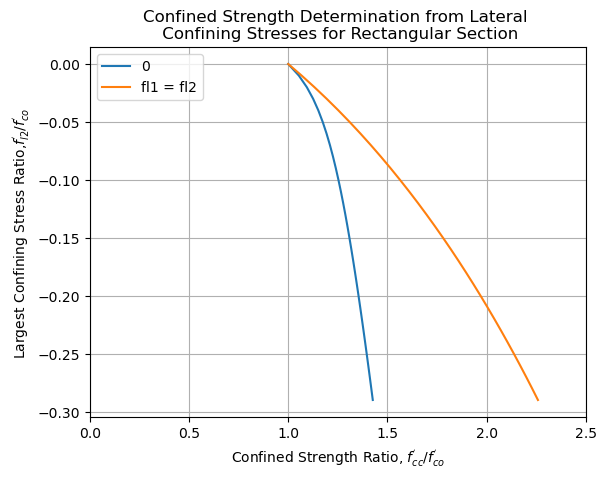

In [4]:
# make data
x = value_arr
y = ratio_arr

# plot
fig, ax = plt.subplots()

ax.plot(value0_arr, y, label='0')
# ax.plot(value02_arr, y, linewidth=1.0)
# ax.plot(value04_arr, y, linewidth=1.0)
# ax.plot(value06_arr, y, linewidth=1.0)
# ax.plot(value08_arr, y, linewidth=1.0)
# ax.plot(value1_arr, y, label='0.1')
# ax.plot(value12_arr, y, linewidth=1.0)
# ax.plot(value14_arr, y, linewidth=1.0)
# ax.plot(value16_arr, y, linewidth=1.0)
# ax.plot(value18_arr, y, linewidth=1.0)
# ax.plot(value2_arr, y, label='0.2')
# ax.plot(value22_arr, y, linewidth=1.0)
# ax.plot(value24_arr, y, linewidth=1.0)
# ax.plot(value26_arr, y, linewidth=1.0)
# ax.plot(value28_arr, y, linewidth=1.0)
ax.plot(x, y, label='fl1 = fl2')
ax.set_xlim(0,2.5)
plt.legend(loc="upper left")
plt.title('Confined Strength Determination from Lateral \n Confining Stresses for Rectangular Section')
plt.xlabel("Confined Strength Ratio, $f^{'}_{cc}/f^{'}_{co}$")
plt.ylabel("Largest Confining Stress Ratio,$f^{'}_{l2}/f^{'}_{co}$ ")

plt.grid()
plt.show()